<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/momentum_investing_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pybind11 --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install cvxpy --q

In [3]:
!pip install riskfolio-lib --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 23.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is 

In [4]:
import riskfolio as rp

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [19]:
nifty50_url = "/content/nifty-500.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['NSE Code'].apply(lambda x: x + ".NS").tolist()
# Bank Nifty Stocks
nifty_stocks = tickers
start_date='2022-01-01'
end_date='2024-02-28'

In [20]:
dataset = yf.download(nifty_stocks, start=start_date,end=end_date)['Adj Close']


[*********************100%%**********************]  501 of 501 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RITES.NS']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


In [21]:
'''
# Define the list of Nifty 50 constituents
nifty_50_constituents = ['RELIANCE.NS', 'SBIN.NS', 'TCS.NS']  # Add more constituents as needed

# Download historical data for each constituent
data = {}
for ticker in nifty_50_constituents:
    data[ticker] = yf.download(ticker, start='1927-01-01', end='2014-12-31')
'''
# Combine the adjusted close prices into a single DataFrame

adj_close_data = {}
for ticker, df in dataset.items():
    if isinstance(df, pd.DataFrame) and 'Adj Close' in df.columns:
        adj_close_data[ticker] = df['Adj Close']
    elif isinstance(df, pd.Series):
        adj_close_data[ticker] = df  # Assuming the Series itself represents the 'Adj Close' prices

adj_close = pd.DataFrame(adj_close_data)


# Calculate monthly returns
returns = adj_close.pct_change(252)
returns2=adj_close.pct_change(126)
returns3=adj_close.pct_change(63)
returns4=adj_close.pct_change(21)
# Step 2: Calculate the monthly momentum variable
momentum_variable = returns+returns2+returns3+returns4

# Step 3: Select the top 25 stocks based on momentum variable
top_50_stocks = momentum_variable.sum().index
top_50_stocks_data = momentum_variable[top_50_stocks]

#
# Step 4: Implement PCA on the selected stocks after handling missing values
cleaned_data = top_50_stocks_data.fillna(0.00001)  # Drop rows with missing values


<ipython-input-21-f8a3cb3ced03>:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = adj_close.pct_change(252)
<ipython-input-21-f8a3cb3ced03>:24: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns2=adj_close.pct_change(126)
<ipython-input-21-f8a3cb3ced03>:25: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns3=adj_close.pct_change(63)
<ipython-input-21-f8a3cb3ced03>:26: FutureW

In [22]:
cleaned_data

,360ONE.NS,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,...,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
2022-01-04,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
2022-01-05,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
2022-01-06,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
2022-01-07,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21,1.453315,0.315015,0.470428,1.112801,-0.439056,0.916642,0.985724,0.367353,0.018359,1.457943,...,-0.010768,-0.502568,0.921846,1.285369,-1.295625,1.011830,0.234881,3.234620,1.937092,0.194944
2024-02-22,1.443470,0.277565,0.495122,1.167368,-0.416259,1.421600,1.002602,0.501806,0.055737,1.534029,...,-0.016302,-0.440694,1.081952,1.739328,-0.869393,1.123223,0.217929,3.580939,1.987138,0.185383
2024-02-23,1.574499,0.278800,0.446294,1.080354,-0.355241,1.420883,0.969662,0.549361,-0.032440,1.502345,...,-0.099925,-0.436996,1.086185,1.568596,-0.819689,1.120581,0.247170,3.713337,2.048582,0.153654


In [23]:
#cleaned_data = cleaned_data.clip(lower=cleaned_data.quantile(0.01), upper=cleaned_data.quantile(0.99), axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

pca = PCA(n_components=3)  # Considering only one component for simplicity
pca.fit(scaled_data)

# Step 5: Select the top 10 stocks based on PCA scores
pca_scores = pca.components_[1]
top_10_index = np.argsort(pca_scores)[-10:]
top_10_stocks = cleaned_data.iloc[:, top_10_index]

# Now, top_10_stocks contains the top 10 stocks for investment based on PCA scores
print(top_10_stocks)


            DATAPATTNS.NS  RAYMOND.NS  TRITURBINE.NS    CCL.NS   KRBL.NS  \
Date                                                                       
2022-01-03       0.000010    0.000010       0.000010  0.000010  0.000010   
2022-01-04       0.000010    0.000010       0.000010  0.000010  0.000010   
2022-01-05       0.000010    0.000010       0.000010  0.000010  0.000010   
2022-01-06       0.000010    0.000010       0.000010  0.000010  0.000010   
2022-01-07       0.000010    0.000010       0.000010  0.000010  0.000010   
...                   ...         ...            ...       ...       ...   
2024-02-21       0.566848    0.503390       1.047682  0.295042 -0.302477   
2024-02-22       1.054541    0.553811       1.062436  0.263628 -0.263949   
2024-02-23       1.213128    0.554401       1.124344  0.261357 -0.284358   
2024-02-26       1.691303    0.620750       1.075061  0.254219 -0.353999   
2024-02-27       1.542465    0.486370       1.145936  0.264465 -0.442994   

           

In [24]:
print(top_10_stocks.columns.tolist())

['DATAPATTNS.NS', 'RAYMOND.NS', 'TRITURBINE.NS', 'CCL.NS', 'KRBL.NS', 'HINDZINC.NS', 'ABCAPITAL.NS', 'M&MFIN.NS', 'CIEINDIA.NS', 'ITC.NS']


[*********************100%%**********************]  10 of 10 completed


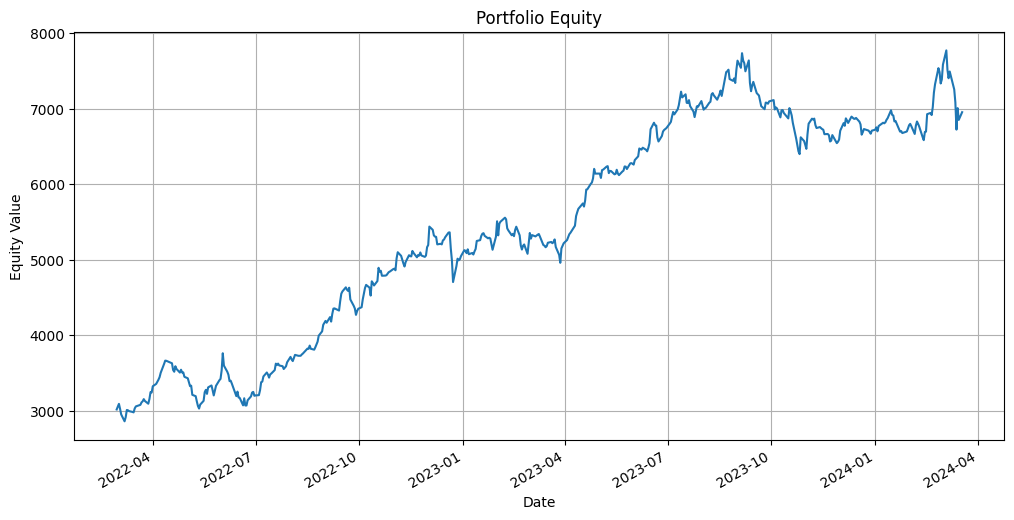

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Define stock symbols and weights
symbols = top_10_stocks.columns.tolist()
weights = [1,1,1,1,1,1,1,1,1,1]
# Download historical price data
data = yf.download(symbols, start="2022-02-28", end=today)["Adj Close"]

# Calculate portfolio return by multiplying weights with daily returns
portfolio_return = (data * weights).sum(axis=1)

# Plot the portfolio return
plt.figure(figsize=(12, 6))
portfolio_return.plot(title="Portfolio Equity")
plt.ylabel("Equity Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [26]:
assets_dataframe=data
Y= assets_dataframe.pct_change().dropna()

<ipython-input-26-2485a014c0ad>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  Y= assets_dataframe.pct_change().dropna()


In [27]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'UCI' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 9.0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T*100)

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,ABCAPITAL.NS,CCL.NS,CIEINDIA.NS,DATAPATTNS.NS,HINDZINC.NS,ITC.NS,KRBL.NS,M&MFIN.NS,RAYMOND.NS,TRITURBINE.NS
weights,5.256367,3.950309,18.802632,18.114237,20.068273,3.431973,7.116869,2.707594,9.659378,10.892369


In [28]:
weights=w.T.values.flatten().tolist()

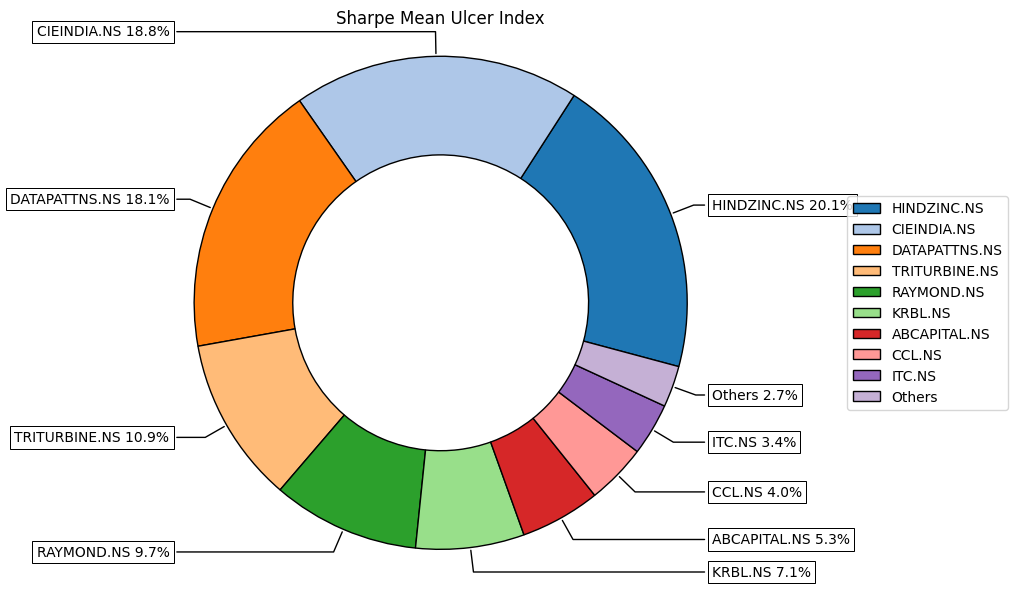

In [29]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Ulcer Index', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

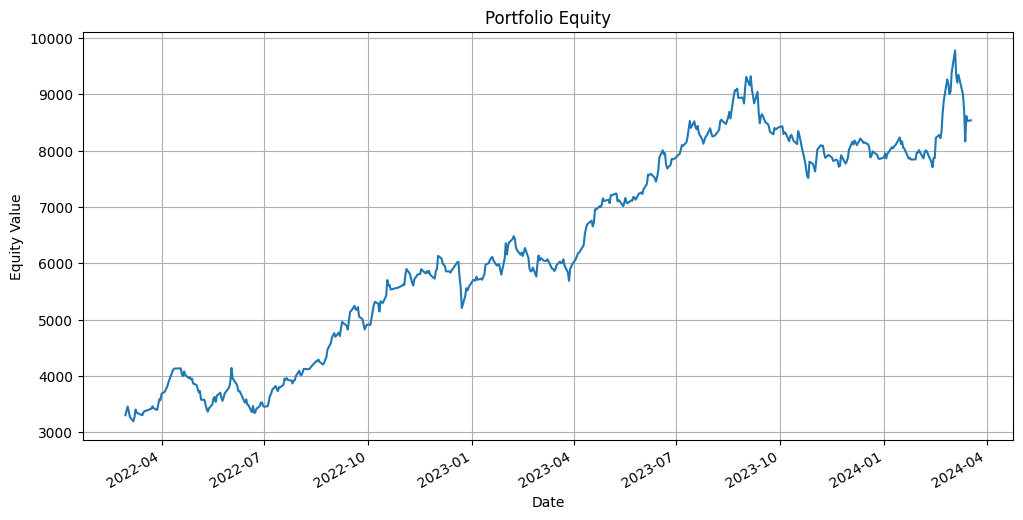

In [30]:

# Calculate portfolio return by multiplying weights with daily returns
portfolio_return = (data * weights).sum(axis=1)*10

# Plot the portfolio return
plt.figure(figsize=(12, 6))
portfolio_return.plot(title="Portfolio Equity")
plt.ylabel("Equity Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()